In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from textblob import TextBlob

# **Probelm 1**

In [ ]:
df=pd.read_csv("movies.csv")
df.head(15)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [ ]:
# since we can't do anything for fixing non-numerical values we will jsut go ahead and drop the nan values in the
# genre coloumn

df.dropna(subset=["GENRE"],inplace =True)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
df.shape[0]

9919

**Looking at the head of the data, tells us that gross coloum maynot contain any value, lets check if its the case and drop it**

In [ ]:
print(df["Gross"].notna().any())

True


In [ ]:
# since the above gives true we will drop that coloumn
df.drop("Gross", axis=1, inplace=True)
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0


**Let's create a new data frame which will be formed by dropping the NaN values and see if we loose a lot of data**

In [ ]:
df_new=df.dropna()
df_new.shape
a=df.shape[0]
b=df_new.shape[0]
lost_data=(a-b)/a*100
print("Here, if we drop all the NaN values then we are loosing ",lost_data,"% of the data")

Here, if we drop all the NaN values then we are loosing  31.656416977517893 % of the data


**In the above created data frame we see that we loose a lot of data and hence we will choose other ways to clean the data and make it work**

In [ ]:
# converting all the data in the votes coloumn in int data type
for i in range(df.shape[0]):
    if pd.notna(df["VOTES"].iloc[i]):
        if isinstance(df["VOTES"].iloc[i], str):
            df["VOTES"].iloc[i] = int(df["VOTES"].iloc[i].replace(",", ""))
        elif isinstance(df["VOTES"].iloc[i], float):
            df["VOTES"].iloc[i] = int(df["VOTES"].iloc[i])

print(type(df["VOTES"].iloc[0]))
print(df.head())


<class 'int'>
                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 NaN   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the e

In [ ]:
# we will create another dataframe where we will replace the NaN numerical columns with the mean
x = df["RATING"].mean()
df.fillna({"RATING":x}, inplace = True)

y = df["RunTime"].mean()
df.fillna({"RunTime":y}, inplace = True)

z=df["VOTES"].mean()
df.fillna({"VOTES":z}, inplace = True)

**Here we have cleaned the data and we will safe the cleaned data to a csv file, name "output.csv"**

In [ ]:
df.to_csv("output.csv", index=False)

**Another approach, not sure if its correct**

In [ ]:
# I am going to fill the NaN values for numrical columns with data depending upon the correlation values from the example, since the data is
# about movies their might be correlation, let's work on df

# usign correlation

# Selecting numerical columns, other wise we could also have used df_new
numerical_df = df.select_dtypes(include=[np.number])

# Computing correlation
correlation_matrix = numerical_df.corr()

# Iterateing over columns to fill NaN values
for target_col in numerical_df.columns:
    # Find the column with the highest correlation to the target column
    correlations = correlation_matrix[target_col].drop(target_col)
    most_correlated_col = correlations.idxmax()
    corr_value = correlations[most_correlated_col]
    known_rows = numerical_df.dropna(subset=[target_col, most_correlated_col])
    missing_rows = numerical_df[numerical_df[target_col].isna() & numerical_df[most_correlated_col].notna()]

    if not missing_rows.empty:
        X = known_rows[[most_correlated_col]].values
        y = known_rows[target_col].values
        model = LinearRegression()
        model.fit(X, y)
        for idx in missing_rows.index:
            predicted_value = model.predict([[numerical_df.loc[idx, most_correlated_col]]])[0]
            df.loc[idx, target_col] = predicted_value

df.to_csv("output1.csv", index=False)


**Summary**

The challenges faced in cleaning the data are:-

1. Empty vlaues or NaN values

2. The Votes and genre coloumn contained both string and float data types

3. The Gross coloumn contained only NaN values, which I removed form the data frame

To summarise what I did while cleaning the data, I first removed the coloumn with only NaN values, then I went ahead and removed all the NaN rows, which resulted in the loss of about 30% of data.

Since, too much data was being lost I used two methods to fill in the NaN cells:-

1. I used mean of the table to fill the lost data, my thought on this was that althoug this made the data workable, it isn't right use other movies' votes or rating to fill the empty cell.

2. The second method I used was to use the value in another column as a measure to fill the empyt cells, I used the correlation funtion to find the must suitable couloumn to be used in linear regression ( only model I knew of).

**Exploratory analysis**

For this part of the problem. I am going with comparison of genre with rating, and i will obtain insights into how people's opinion is affected with genre

In [ ]:
# I will work with "output1.csv"

df1=pd.read_csv("output1.csv")
for i in range(df.shape[0]):
  if type(df1["GENRE"][i])==str:
    df1["GENRE"][i]=df1["GENRE"][i].split(",")
print(df1["GENRE"][0])

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["GENRE"][i]=df1["GENRE"][i].split(",")
<ipython-input-15-af7ff434a3f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["GENRE"][i]=df1["GENRE"][i].split(",")
<ipython-input-15-af7ff434a3f1>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exampl

['\nAction', ' Horror', ' Thriller            ']


<ipython-input-15-af7ff434a3f1>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["GENRE"][i]=df1["GENRE"][i].split(",")
<ipython-input-15-af7ff434a3f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

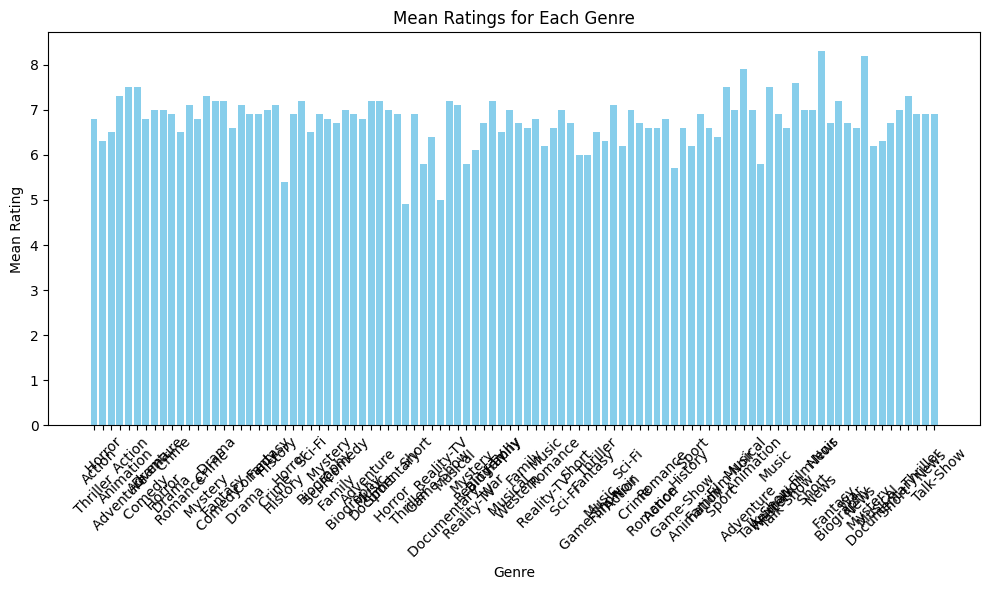

In [ ]:
# now that we have arrays of genres in each row let's make dictonaries for different generes
genre_ratings = {}


for index, row in df1.iterrows():
    genres = row["GENRE"]
    rating = row["RATING"]
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = []
        genre_ratings[genre].append(rating)

genre_mean_ratings = {}

for genre, ratings in genre_ratings.items():
    mean_rating = round(np.mean(ratings), 1)
    genre_mean_ratings[genre] = mean_rating

# Plotting the bar graph
genres = list(genre_mean_ratings.keys())
mean_ratings = list(genre_mean_ratings.values())
plt.figure(figsize=(10, 6))
plt.bar(genres, mean_ratings, color='skyblue')
plt.title('Mean Ratings for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Probelm 2**
**Sentiment Analysis Using Textblob**

In [ ]:
df_s=pd.read_csv("IMDB Dataset.csv")

In [ ]:
df_s.head()
print(df_s)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df_s['Textblob_sentiment'] = df_s['review'].apply(get_sentiment)

In [ ]:
# percentages of opinions
count_positive=0
count_negative=0
count_neutral=0
for i in range(df_s.shape[0]):
  if df_s["Textblob_sentiment"][i]=='positive':
    count_positive=count_positive+1
  elif df_s["Textblob_sentiment"][i]=='negative':
    count_negative=count_negative+1
  elif df_s["Textblob_sentiment"][i]=='neutral':
    count_neutral=count_neutral+1
percentage_count_positive=count_positive/df_s.shape[0]*100
percentage_count_negative=count_negative/df_s.shape[0]*100
percentage_count_neutral=count_neutral/df_s.shape[0]*100

print("The percentage of people with positive response is ",percentage_count_positive,"%")
print("The percentage of people with negative response is ",percentage_count_negative,"%")
print("The percentage of people with neutral response is ",percentage_count_neutral,"%")

The percentage of people with positive response is  75.866 %
The percentage of people with negative response is  24.072 %
The percentage of people with neutral response is  0.062 %
